## Heart Disease project
1. Preparing tools and create a data dictionary

In [4]:
# Importing data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting in jupyter
%matplotlib inline

# Models for ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation of models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# 2. Importing data

In [11]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()
# To check whether the data is evenly distributed between 0 and 1.


1    165
0    138
Name: target, dtype: int64

In [6]:
# Information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# To get mean, median,std,var.....
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


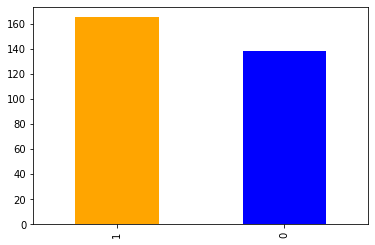

In [10]:
# Plot to check target value counts
df["target"].value_counts().plot(kind="bar" , color=["orange",'blue']);

In [12]:
# To compare two columns
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


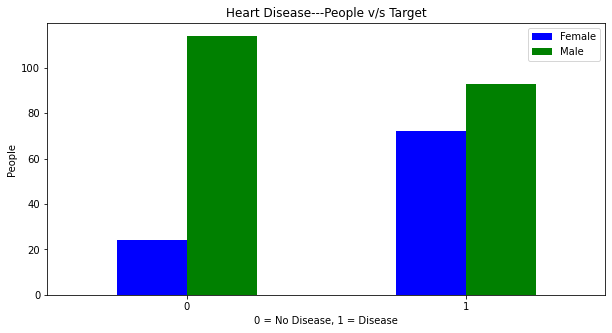

In [20]:
# Plot for comparing
pd.crosstab(df.target , df.sex).plot(kind="bar",figsize=(10,5), color=["blue","green"])
plt.title("Heart Disease---People v/s Target")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("People")
plt.legend(["Female","Male"])
plt.xticks(rotation=0); # To avoid vertical numbers


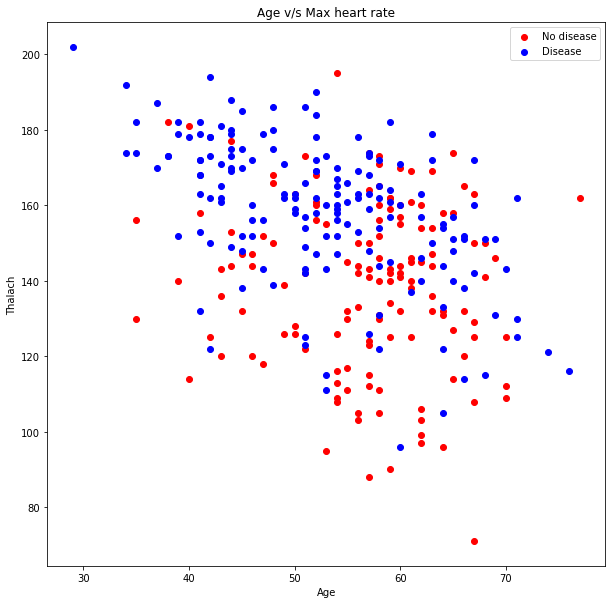

In [26]:
# Comparing Age v/s Max heart rate
plt.figure(figsize=(10,10))
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="red") # For No disease
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="blue") # For disease
plt.legend(["No disease","Disease"])
plt.title("Age v/s Max heart rate")
plt.xlabel("Age")
plt.ylabel("Thalach");

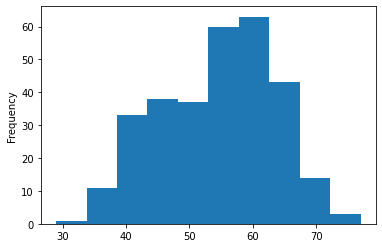

In [27]:
df.age.plot.hist();

In [28]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


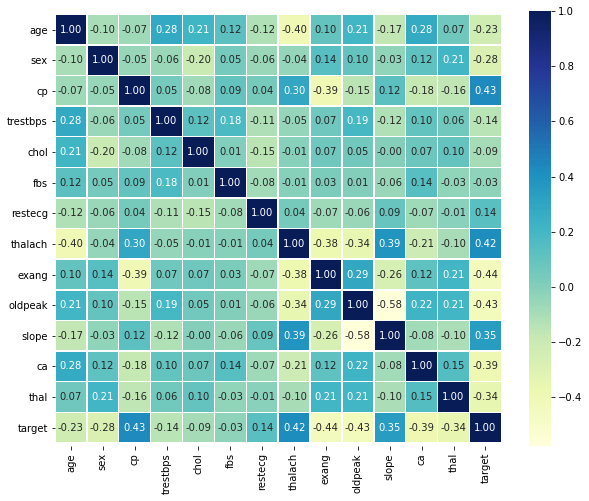

In [36]:
# Plotting correlation matrix using Seaborn
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix, annot=True, fmt="0.2f", linewidths=0.5, cmap="YlGnBu");
# To align the text properly
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.1,top-0.1);


### 5. Modelling

In [12]:
# Splitting data into X and y
X=df.drop(["target"],axis=1)
y=df["target"]
# Splitting data into testing and training data.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

242

# Three main models to solve:
1. Logistic Regression
2. Kneighbors
3. RandomForestClassifier

In [19]:
# Give models in the form a dictionary
models={"Logistic":LogisticRegression(), 
       "KN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_model(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test, y_test)
    return model_score


In [52]:
model_scores=fit_model(models,X_train, X_test, y_train, y_test)
print(model_scores)

{'Logistic': 0.8852459016393442, 'KN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


C:\Users\HP\Desktop\Ml_course\project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


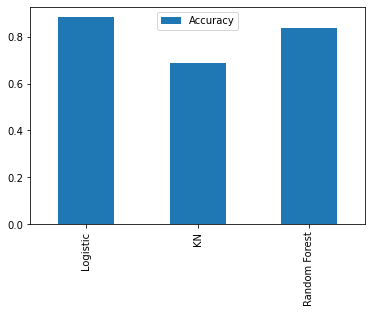

In [51]:
model_comparison=pd.DataFrame(model_scores,index=["Accuracy"])
model_comparison.T.plot.bar();


# Hyperparameter Tuning With Kneighbors

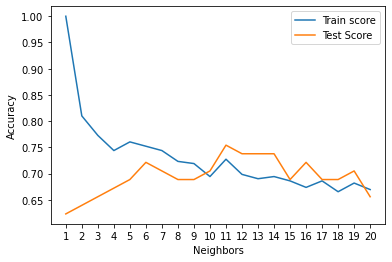

In [26]:
# Tuning Kneighbors first......
train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
neighbors=range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors,test_scores, label="Test Score")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(np.arange(1,21,1));
    

# Hyperparameters tuning with RandomizedSearchCV
1. With LogisticRegression
2. With RandomForestClassifier

In [41]:
#With LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
#With RandomForest
rf_grid={"n_estimators":np.arange(10,1000,100),
         "max_depth":[None,3,5,7],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [42]:
# Tune LogisticReg
np.random.seed(42)
rs_log=RandomizedSearchCV(LogisticRegression(),
                         param_distributions=log_reg_grid,
                         cv=5,
                        n_iter=20,
                         verbose=True)
rs_log.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log.score(X_test,y_test)

0.8852459016393442

In [46]:
# Tuning RandomForest
rf_random=RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=10,
                            verbose=True)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 7],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [48]:
rf_random.best_params_

{'n_estimators': 510,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': None}

In [49]:
rf_

0.8688524590163934

## Using GridSearchCV For LogisticRegression

In [56]:
# Setting up the grid
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
gs_log=GridSearchCV(LogisticRegression(),
                   param_grid=log_reg_grid,
                   verbose=True)
gs_log.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [57]:
gs_log.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
gs_log.score(X_test,y_test)

0.8852459016393442

## Evaluating
 *Roc and Auc curve
 *Confusion Matrix
 *Precision
 *Recall
 *F1 score
 *Classification Report

In [59]:
# Predicted data
y_preds=gs_log.predict(X_test)

In [60]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

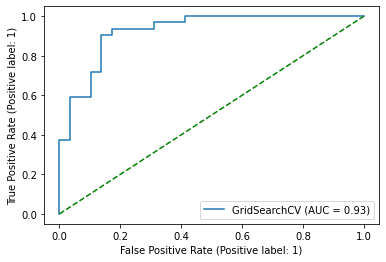

In [69]:
# Plotting ROC curve
plot_roc_curve(gs_log,X_test,y_test)
plt.plot([0,1],[0,1],
         color="green",
         linestyle="--",
        label="Guessing");

In [84]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_preds)

0.8841594827586207

In [70]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


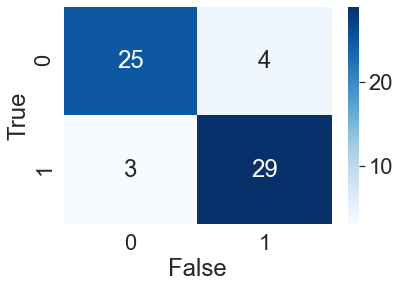

In [80]:
sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test,y_preds),
           annot=True,
           cmap="Blues",
           cbar=True)
plt.xlabel("False")
plt.ylabel("True");

In [85]:
# Classification report only for 1 set of data
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculating precision, accuracy, f1 score and recall using cross val score

In [91]:
#Accuracy 
cv_acc=cross_val_score(gs_log,
                       X,
                       y,
                       cv=5,
                       n_jobs=1,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [94]:
# Precision
cv_pre=cross_val_score(gs_log,
                       X,
                       y,
                       cv=5,
                       n_jobs=1,
                      scoring="precision")
cv_pre=np.mean(cv_pre)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [95]:
# Precision
cv_rec=cross_val_score(gs_log,
                       X,
                       y,
                       cv=5,
                       n_jobs=1,
                      scoring="recall")
cv_rec=np.mean(cv_rec)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [98]:
# Precision
cv_f1=cross_val_score(gs_log,
                       X,
                       y,
                       cv=5,
                       n_jobs=1,
                      scoring="f1")
cv_f1=np.mean(cv_f1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


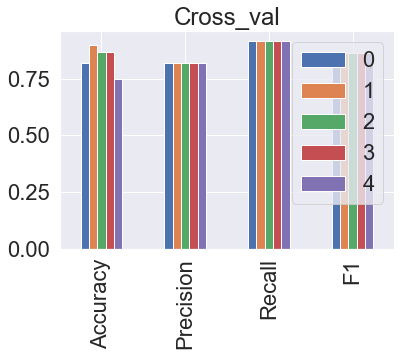

<Figure size 720x720 with 0 Axes>

In [131]:
get_scores=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f1})
get_scores.T.plot.bar(title="Cross_val")
plt.legend([0,1,2,3,4])
plt.figure(figsize=(10,10));

# Feature Importance

In [124]:
# For logisticRegression model
gs_log.best_params_
clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [126]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

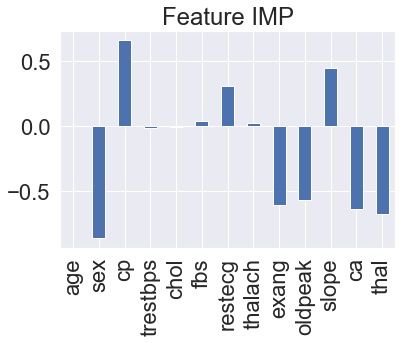

In [129]:
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature IMP",legend=False);